In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

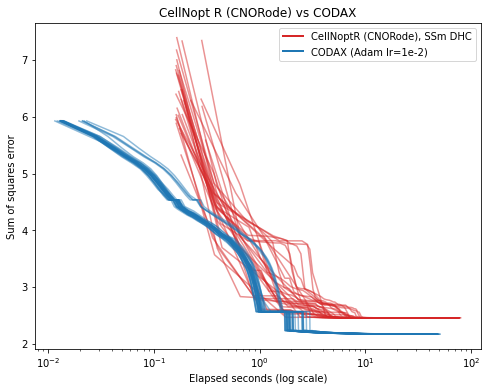

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))

dfs = []
for i in range(30):
    df = pd.read_csv(f'cno/result{i+1}.csv').iloc[:, 1:].set_index('elapsed_seconds')
    df.plot(logx=True, ax=ax, color='tab:red', style='-', alpha=0.5, legend=False)
    dfs.append(df)
    
for i in range(30):
    df_codax = pd.read_csv(f'codax/results_1e-2_{i}.csv')[['elapsed_seconds', 'best_sse']].set_index('elapsed_seconds')
    df_codax.plot(logx=True, color='tab:blue', ax=ax, alpha=0.5, legend=False)
    

legend_elements = [Line2D([0], [0], color='tab:red', lw=2, label='CellNoptR (CNORode), SSm DHC'),
                   Line2D([0], [0], color='tab:blue',lw=2, label='CODAX (Adam lr=1e-2)')]

ax.legend(handles=legend_elements)

plt.title('CellNopt R (CNORode) vs CODAX');
plt.xlabel('Elapsed seconds (log scale)');
plt.ylabel('Sum of squares error');